In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
columns = ["Image_Id","gt_total", "gt_date","gt_time", "pred_total", "pred_date", "pred_time", "conf_total", "conf_time","conf_date"]

In [4]:
df = pd.read_csv("data/Assigment 2 - Train.txt", sep="|", names=columns)
test = pd.read_csv("data/Assignment 2 - Test.txt", sep="|", names=columns)

In [5]:
df.head()

,Image_Id,gt_total,gt_date,gt_time,pred_total,pred_date,pred_time,conf_total,conf_time,conf_date
0,1,160,2016-09-11,13:52:00,160,2016-03-11,13:52:00,-0.001974,-1.180410,-0.008496
1,3,195,2016-09-23,18:52:00,195,2016-09-23,18:52:00,-0.011053,-0.864236,-0.018932
2,4,145,2016-10-02,15:58:00,145,2017-10-18,15:58:00,-0.002920,-2.266910,-0.978772
3,4,243,2016-09-26,18:25:00,243,2017-09-26,18:25:00,-0.075094,-0.810062,-0.123047
4,6,71,2016-09-19,13:47:00,71,2016-08-19,13:47:00,-0.014107,-0.664796,-0.003986


In [6]:
df.isnull().sum()

Image_Id      0
gt_total      0
gt_date       0
gt_time       0
pred_total    0
pred_date     0
pred_time     0
conf_total    0
conf_time     0
conf_date     0
dtype: int64

In [7]:
# df["gt_date"].value_counts()

In [8]:
# df["gt_time"].value_counts()

In [9]:
# df["gt_total"].value_counts()

In [10]:
# df["pred_date"].value_counts()

In [11]:
# df["pred_time"].value_counts()

In [12]:
# df["pred_total"].value_counts()

In [13]:
# df[df["pred_time"] == "noTime"]

In [14]:
# test[test["pred_time"] == "noTime"]

In [15]:
time_df = df[df["pred_time"] != "noTime"]

In [16]:
time_test_df = test[test["pred_time"] != "noTime"]

In [17]:
df["gt_date"] = pd.to_datetime(df["gt_date"])
df["gt_time"] = pd.to_datetime(df["gt_time"])
df["pred_date"] = pd.to_datetime(df["pred_date"])
# df["pred_time"] = pd.to_datetime(df["pred_time"])

In [18]:
test["gt_date"] = pd.to_datetime(test["gt_date"])
test["gt_time"] = pd.to_datetime(test["gt_time"])
test["pred_date"] = pd.to_datetime(test["pred_date"])

In [19]:
df.dtypes

Image_Id               int64
gt_total               int64
gt_date       datetime64[ns]
gt_time       datetime64[ns]
pred_total             int64
pred_date     datetime64[ns]
pred_time             object
conf_total           float64
conf_time            float64
conf_date            float64
dtype: object

In [20]:
df.head()

,Image_Id,gt_total,gt_date,gt_time,pred_total,pred_date,pred_time,conf_total,conf_time,conf_date
0,1,160,2016-09-11,2017-07-21 13:52:00,160,2016-03-11,13:52:00,-0.001974,-1.180410,-0.008496
1,3,195,2016-09-23,2017-07-21 18:52:00,195,2016-09-23,18:52:00,-0.011053,-0.864236,-0.018932
2,4,145,2016-10-02,2017-07-21 15:58:00,145,2017-10-18,15:58:00,-0.002920,-2.266910,-0.978772
3,4,243,2016-09-26,2017-07-21 18:25:00,243,2017-09-26,18:25:00,-0.075094,-0.810062,-0.123047
4,6,71,2016-09-19,2017-07-21 13:47:00,71,2016-08-19,13:47:00,-0.014107,-0.664796,-0.003986


# Predicting Total Variable

In [21]:
total_df = df[["Image_Id", "gt_total", "pred_total", "conf_total"]]

In [22]:
test_total = test[["Image_Id", "gt_total", "pred_total", "conf_total"]]

In [23]:
total_df.head()

,Image_Id,gt_total,pred_total,conf_total
0,1,160,160,-0.001974
1,3,195,195,-0.011053
2,4,145,145,-0.002920
3,4,243,243,-0.075094
4,6,71,71,-0.014107


In [24]:
total_df["total_label"] = df.apply(lambda x: 1 if x["gt_total"] == x["pred_total"] else 0, axis=1)

In [25]:
test_total["total_label"] = df.apply(lambda x: 1 if x["gt_total"] == x["pred_total"] else 0, axis=1)

In [26]:
total_df["total_label"].value_counts()

1    4542
0     458
Name: total_label, dtype: int64

In [27]:
total_df["gt_total"].max()

54196

In [28]:
total_df[total_df["gt_total"]>10000]["total_label"].value_counts()

1    24
0     9
Name: total_label, dtype: int64

In [29]:
def convert_string(x):
    _str_len = 5
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

In [30]:
total_df.columns

Index(['Image_Id', 'gt_total', 'pred_total', 'conf_total', 'total_label'], dtype='object')

In [31]:
# total_df["gt_total"] = total_df["gt_total"].apply(convert_string)
total_df["pred_total"] = total_df["pred_total"].apply(convert_string)

In [32]:
# test_total["gt_total"] = test_total["gt_total"].apply(convert_string)
test_total["pred_total"] = test_total["pred_total"].apply(convert_string)

In [33]:
total_df.dtypes

Image_Id         int64
gt_total         int64
pred_total      object
conf_total     float64
total_label      int64
dtype: object

In [34]:
for pos in range(0,5):
#     total_df[str(pos+1)+"_digit_gt"] = total_df["gt_total"].apply(lambda x: x[pos])
    total_df[str(pos+1)+"_digit_pred"] = total_df["pred_total"].apply(lambda x: x[pos])
#     test_total[str(pos+1)+"_digit_gt"] = test_total["gt_total"].apply(lambda x: x[pos])
    test_total[str(pos+1)+"_digit_pred"] = test_total["pred_total"].apply(lambda x: x[pos])

In [35]:
total_df.head()

,Image_Id,gt_total,pred_total,conf_total,total_label,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,1,160,00160,-0.001974,1,0,0,1,6,0
1,3,195,00195,-0.011053,1,0,0,1,9,5
2,4,145,00145,-0.002920,1,0,0,1,4,5
3,4,243,00243,-0.075094,1,0,0,2,4,3
4,6,71,00071,-0.014107,1,0,0,0,7,1


In [36]:
# total_df["conf_total"]=(total_df["conf_total"]-total_df["conf_total"].mean())/total_df["conf_total"].std()
# test_total["conf_total"]=(test_total["conf_total"]-test_total["conf_total"].mean())/test_total["conf_total"].std()

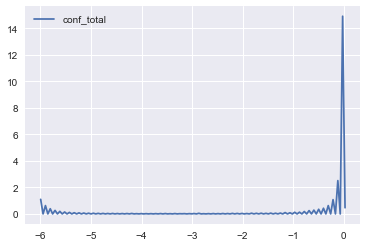

In [37]:
sns.kdeplot(total_df["conf_total"])

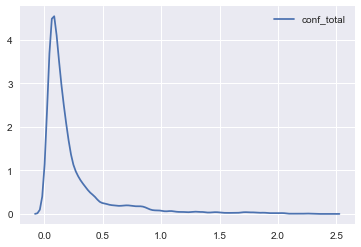

In [38]:
sns.kdeplot(np.sqrt(total_df["conf_total"]*-1))

In [39]:
total_df["conf_total"] = total_df["conf_total"]*-1
test_total["conf_total"] = test_total["conf_total"]*-1

total_df["conf_total"] = np.sqrt(total_df["conf_total"])
test_total["conf_total"] = np.sqrt(test_total["conf_total"])

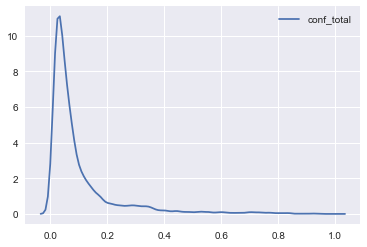

In [40]:
sns.kdeplot((total_df["conf_total"]-total_df["conf_total"].min())/(total_df["conf_total"].max()-total_df["conf_total"].min()))

In [41]:
# total_df["conf_total"]=(total_df["conf_total"]-total_df["conf_total"].min())/(total_df["conf_total"].max()-total_df["conf_total"].min())
# test_total["conf_total"]=(test_total["conf_total"]-test_total["conf_total"].min())/(test_total["conf_total"].max()-test_total["conf_total"].min())

In [42]:
total_df["conf_total"]=(total_df["conf_total"]-total_df["conf_total"].mean())/total_df["conf_total"].std()
test_total["conf_total"]=(test_total["conf_total"]-test_total["conf_total"].mean())/test_total["conf_total"].std()

In [43]:
total_q1 = total_df['conf_total'].quantile(.25)
total_q3 = total_df['conf_total'].quantile(.75)
total_iqr = total_q3 - total_q1
total_mask = total_df['conf_total'].between(total_q1 - 1.5*total_iqr, total_q3 + 1.5*total_iqr, inclusive=True)

total_df = total_df.loc[total_mask]

In [44]:
total_df.shape

(4448, 10)

In [45]:
for col in total_df.columns:
    total_df[col] = pd.to_numeric(total_df[col])
    test_total[col] = pd.to_numeric(test_total[col])

In [46]:
X_total = total_df.drop(["Image_Id", "gt_total", "pred_total", "total_label"], axis=1)
y_total = total_df["total_label"]

In [47]:
X_total_test = test_total.drop(["Image_Id", "gt_total", "pred_total", "total_label"], axis=1)
y_total_test = test_total["total_label"]

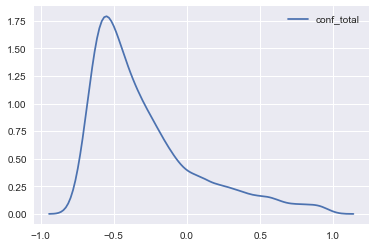

In [48]:
sns.kdeplot(total_df["conf_total"])

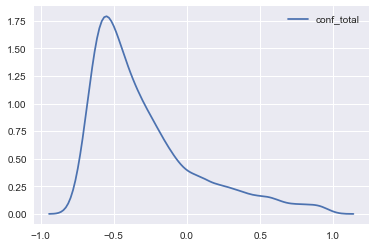

In [49]:
sns.kdeplot(X_total["conf_total"])

In [50]:
X_total.head()

,conf_total,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,-0.628195,0,0,1,6,0
1,-0.439147,0,0,1,9,5
2,-0.598274,0,0,1,4,5
3,0.086860,0,0,2,4,3
4,-0.396673,0,0,0,7,1


In [51]:
X_total_test.head()

,conf_total,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,-0.670997,0,0,7,7,1
1,-0.413121,0,2,0,5,4
2,0.779824,0,0,0,2,0
3,-0.536443,0,0,6,8,0
4,-0.558002,0,1,0,1,9


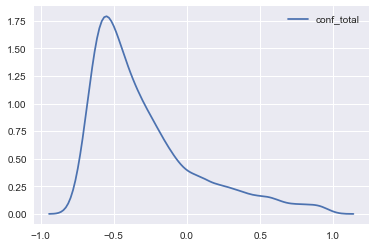

In [52]:
sns.kdeplot(X_total["conf_total"])

In [53]:
X_total_test.head()

,conf_total,1_digit_pred,2_digit_pred,3_digit_pred,4_digit_pred,5_digit_pred
0,-0.670997,0,0,7,7,1
1,-0.413121,0,2,0,5,4
2,0.779824,0,0,0,2,0
3,-0.536443,0,0,6,8,0
4,-0.558002,0,1,0,1,9


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [55]:
from xgboost import XGBClassifier

/home/iamnewneo/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [56]:
from sklearn.metrics import accuracy_score

In [57]:
rf = XGBClassifier()

In [58]:
# rf = RandomForestClassifier()

In [59]:
rf.fit(X_total,y_total)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [60]:
def get_scores(est, y, X, name):
    print("Below are the results for : " + str(name) + " model")
    print("Accuracy score of model is: " + str(accuracy_score(y, est.predict(X))))
    print("F1 score of model is: " + str(f1_score(y, est.predict(X))))
    print("Precision score of model is: " + str(precision_score(y, est.predict(X))))
    print("Recall score of model is: " + str(recall_score(y, est.predict(X))))

In [61]:
get_scores(rf, y_total_test, X_total_test, "Predicting Total")

Below are the results for : Predicting Total model
Accuracy score of model is: 0.904
F1 score of model is: 0.949367088608
Precision score of model is: 0.905432595573
Recall score of model is: 0.9977827051


In [62]:
rf.feature_importances_

array([ 0.50353354,  0.        ,  0.05830389,  0.17314488,  0.11660777,
        0.14840989], dtype=float32)

In [63]:
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

In [64]:
# xg_total = XGBClassifier()
# xg_total_gs = GridSearchCV(xg_total, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
# xg_total_gs_result = xg_total_gs.fit(X_total, y_total)

In [65]:
# get_scores(xg_total_gs.best_estimator_, y_total_test, X_total_test)

In [66]:
# f1_score(y_total_test, rf.predict(X_total_test))

# precision_score(y_total_test, rf.predict(X_total_test))

# recall_score(y_total_test, rf.predict(X_total_test))

In [67]:
# clf = RandomForestClassifier()
# param_grid = { "n_estimators": list(range(100,400,50)),
#            "criterion": ["entropy"],
#            "max_depth": list(range(2,20)),
#              }
# grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, scoring="f1")
# grid_search.fit(X_total, y_total)

In [68]:
# grid_search.best_estimator_

In [69]:
# get_scores(grid_search.best_estimator_, y_total_test, X_total_test)

# Predicting Time Variable

In [70]:
time_df.head()
time_df = time_df.drop(["gt_total", "gt_date", "pred_total", "pred_date", "conf_total", "conf_date"], axis=1)

In [71]:
time_test_df = time_test_df.drop(["gt_total", "gt_date", "pred_total", "pred_date", "conf_total", "conf_date"], axis=1)

In [72]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time
0,1,13:52:00,13:52:00,-1.180410
1,3,18:52:00,18:52:00,-0.864236
2,4,15:58:00,15:58:00,-2.266910
3,4,18:25:00,18:25:00,-0.810062
4,6,13:47:00,13:47:00,-0.664796


In [73]:
time_test_df.head()

,Image_Id,gt_time,pred_time,conf_time
0,4983,22:59:00,22:59:00,-1.782610
1,4984,00:31:00,00:31:00,-0.008186
2,4987,12:50:00,12:50:00,-0.581153
3,4988,21:26:00,21:26:00,-1.665860
4,4989,22:36:00,22:36:00,-1.693240


In [74]:
time_df["gt_time"] = pd.to_datetime(time_df["gt_time"])
time_df["pred_time"] = pd.to_datetime(time_df["pred_time"])

time_test_df["gt_time"] = pd.to_datetime(time_test_df["gt_time"])
time_test_df["pred_time"] = pd.to_datetime(time_test_df["pred_time"])

In [75]:
time_df["time_label"] = time_df.apply(lambda x: 1 if x["gt_time"] == x["pred_time"] else 0, axis=1)
time_test_df["time_label"] = time_test_df.apply(lambda x: 1 if x["gt_time"] == x["pred_time"] else 0, axis=1)

In [76]:
# time_test_df[time_test_df["pred_date"] < "2016"]

# time_df[time_df["pred_date"] < "2016"]

In [77]:
# time_df["gt_time"].apply(lambda x: x.time().hour).value_counts()

In [78]:
# time_df["gt_time"].apply(lambda x: x.time().minute).value_counts()

In [79]:
def convert_hour(x):
    x = x.time().hour
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)
    
def convert_min(x):
    x = x.time().minute
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

In [80]:
# time_df["gt_hr_time"] = time_df["gt_time"].apply(convert_hour)
time_df["pred_hr_time"] = time_df["pred_time"].apply(convert_hour)
# time_df["gt_min_time"] = time_df["gt_time"].apply(convert_min)
time_df["pred_min_time"] = time_df["pred_time"].apply(convert_min)


# time_test_df["gt_hr_time"] = time_test_df["gt_time"].apply(convert_hour)
time_test_df["pred_hr_time"] = time_test_df["pred_time"].apply(convert_hour)
# time_test_df["gt_min_time"] = time_test_df["gt_time"].apply(convert_min)
time_test_df["pred_min_time"] = time_test_df["pred_time"].apply(convert_min)

In [81]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,pred_hr_time,pred_min_time
0,1,2017-07-21 13:52:00,2017-07-21 13:52:00,-1.180410,1,13,52
1,3,2017-07-21 18:52:00,2017-07-21 18:52:00,-0.864236,1,18,52
2,4,2017-07-21 15:58:00,2017-07-21 15:58:00,-2.266910,1,15,58
3,4,2017-07-21 18:25:00,2017-07-21 18:25:00,-0.810062,1,18,25
4,6,2017-07-21 13:47:00,2017-07-21 13:47:00,-0.664796,1,13,47


In [82]:
for pos in range(0,2):
#     time_df[str(pos+1)+"_digit_hr"] = time_df["gt_hr_time"].apply(lambda x: x[pos])
    time_df[str(pos+1)+"_digit_hr_pred"] = time_df["pred_hr_time"].apply(lambda x: x[pos])
    
#     time_df[str(pos+1)+"_digit_min"] = time_df["gt_min_time"].apply(lambda x: x[pos])
    time_df[str(pos+1)+"_digit_min_pred"] = time_df["pred_min_time"].apply(lambda x: x[pos])
    
    
    
#     time_test_df[str(pos+1)+"_digit_hr"] = time_test_df["gt_hr_time"].apply(lambda x: x[pos])
    time_test_df[str(pos+1)+"_digit_hr_pred"] = time_test_df["pred_hr_time"].apply(lambda x: x[pos])
    
#     time_test_df[str(pos+1)+"_digit_min"] = time_test_df["gt_min_time"].apply(lambda x: x[pos])
    time_test_df[str(pos+1)+"_digit_min_pred"] = time_test_df["pred_min_time"].apply(lambda x: x[pos])

In [83]:
time_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,pred_hr_time,pred_min_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,1,2017-07-21 13:52:00,2017-07-21 13:52:00,-1.180410,1,13,52,1,5,3,2
1,3,2017-07-21 18:52:00,2017-07-21 18:52:00,-0.864236,1,18,52,1,5,8,2
2,4,2017-07-21 15:58:00,2017-07-21 15:58:00,-2.266910,1,15,58,1,5,5,8
3,4,2017-07-21 18:25:00,2017-07-21 18:25:00,-0.810062,1,18,25,1,2,8,5
4,6,2017-07-21 13:47:00,2017-07-21 13:47:00,-0.664796,1,13,47,1,4,3,7


In [84]:
time_test_df.head()

,Image_Id,gt_time,pred_time,conf_time,time_label,pred_hr_time,pred_min_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,4983,2017-07-21 22:59:00,2017-07-21 22:59:00,-1.782610,1,22,59,2,5,2,9
1,4984,2017-07-21 00:31:00,2017-07-21 00:31:00,-0.008186,1,00,31,0,3,0,1
2,4987,2017-07-21 12:50:00,2017-07-21 12:50:00,-0.581153,1,12,50,1,5,2,0
3,4988,2017-07-21 21:26:00,2017-07-21 21:26:00,-1.665860,1,21,26,2,2,1,6
4,4989,2017-07-21 22:36:00,2017-07-21 22:36:00,-1.693240,1,22,36,2,3,2,6


In [85]:
time_df["conf_time"] = time_df["conf_time"]*-1
time_test_df["conf_time"] = time_test_df["conf_time"]*-1

time_df["conf_time"] = np.sqrt(time_df["conf_time"])
time_test_df["conf_time"] = np.sqrt(time_test_df["conf_time"])

In [86]:
time_df["conf_time"]=(time_df["conf_time"]-time_df["conf_time"].mean())/time_df["conf_time"].std()
time_test_df["conf_time"]=(time_test_df["conf_time"]-time_test_df["conf_time"].mean())/time_test_df["conf_time"].std()

In [87]:
# time_df["conf_time"] = np.log(time_df["conf_time"]+1)
# time_test_df["conf_time"] = np.log(time_test_df["conf_time"]+1)

In [88]:
time_q1 = time_df['conf_time'].quantile(.25)
time_q3 = time_df['conf_time'].quantile(.75)
time_iqr = time_q3 - time_q1
time_mask = time_df['conf_time'].between(time_q1 - 1.5*time_iqr, time_q3 + 1.5*time_iqr, inclusive=True)

time_df = time_df.loc[time_mask]

In [89]:
for col in time_df.columns:
    time_df[col] = pd.to_numeric(time_df[col])
    time_test_df[col] = pd.to_numeric(time_test_df[col])

In [90]:
X_time = time_df.drop(["Image_Id", "gt_time", "pred_time", "pred_hr_time", "pred_min_time", "time_label"],axis=1)
X_time_test = time_test_df.drop(["Image_Id", "gt_time", "pred_time", "pred_hr_time", "pred_min_time", "time_label"],axis=1)

In [91]:
X_time.head()

,conf_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,0.675982,1,5,3,2
1,0.237267,1,5,8,2
2,1.848582,1,5,5,8
3,0.154437,1,2,8,5
4,-0.082467,1,4,3,7


In [92]:
X_time_test.head()

,conf_time,1_digit_hr_pred,1_digit_min_pred,2_digit_hr_pred,2_digit_min_pred
0,1.430709,2,5,2,9
1,-2.082604,0,3,0,1
2,-0.186160,1,5,2,0
3,1.305206,2,2,1,6
4,1.335024,2,3,2,6


In [93]:
y_time = time_df["time_label"]
y_time_test = time_test_df["time_label"]

In [94]:
# rf_time = RandomForestClassifier()

In [95]:
rf_time = XGBClassifier()

In [96]:
rf_time.fit(X_time,y_time)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [97]:
get_scores(rf_time, y_time_test, X_time_test, "Predicting Time")

Below are the results for : Predicting Time model
Accuracy score of model is: 0.845833333333
F1 score of model is: 0.914746543779
Precision score of model is: 0.85376344086
Recall score of model is: 0.985111662531


In [98]:
rf_time.feature_importances_

array([ 0.45522389,  0.07014925,  0.13283582,  0.17313433,  0.16865672], dtype=float32)

In [99]:
# xg_time = XGBClassifier()
# xg_time_gs = GridSearchCV(xg_time, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
# xg_time_gs_result = xg_time_gs.fit(X_time, y_time)

In [100]:
# get_scores(xg_time_gs.best_estimator_, y_time_test, X_time_test)

# Predicting Date Variable

In [101]:
df.columns

Index(['Image_Id', 'gt_total', 'gt_date', 'gt_time', 'pred_total', 'pred_date',
       'pred_time', 'conf_total', 'conf_time', 'conf_date'],
      dtype='object')

In [102]:
date_df = df[["Image_Id", "gt_date", "pred_date", "conf_date"]]

In [103]:
date_df_test = test[["Image_Id", "gt_date", "pred_date", "conf_date"]]

In [104]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date
0,1,2016-09-11,2016-03-11,-0.008496
1,3,2016-09-23,2016-09-23,-0.018932
2,4,2016-10-02,2017-10-18,-0.978772
3,4,2016-09-26,2017-09-26,-0.123047
4,6,2016-09-19,2016-08-19,-0.003986


In [105]:
date_df["gt_date"] = pd.to_datetime(date_df["gt_date"])
date_df["pred_date"] = pd.to_datetime(date_df["pred_date"])

date_df_test["gt_date"] = pd.to_datetime(date_df_test["gt_date"])
date_df_test["pred_date"] = pd.to_datetime(date_df_test["pred_date"])

In [106]:
def convert_mon(x):
    x = str(x)
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)
    
def convert_day(x):
    x = str(x)
    _str_len = 2
    x_len = len(str(x))
    diff = _str_len - x_len
    if diff>0:
        return str(("0" * diff)+str(x))
    else:
        return str(x)

def convert_year(x):
    x = str(x)
    _str_len = 2
    return str(str(x)[2:])

In [107]:
# date_df["gt_mon"] = pd.DatetimeIndex(date_df["gt_date"]).month
# date_df["gt_day"] = pd.DatetimeIndex(date_df["gt_date"]).day
# date_df["gt_year"] = pd.DatetimeIndex(date_df["gt_date"]).year

# date_df_test["gt_mon"] = pd.DatetimeIndex(date_df_test["gt_date"]).month
# date_df_test["gt_day"] = pd.DatetimeIndex(date_df_test["gt_date"]).day
# date_df_test["gt_year"] = pd.DatetimeIndex(date_df_test["gt_date"]).year

In [108]:
date_df["pred_mon"] = pd.DatetimeIndex(date_df["pred_date"]).month
date_df["pred_day"] = pd.DatetimeIndex(date_df["pred_date"]).day
date_df["pred_year"] = pd.DatetimeIndex(date_df["pred_date"]).year

date_df_test["pred_mon"] = pd.DatetimeIndex(date_df_test["pred_date"]).month
date_df_test["pred_day"] = pd.DatetimeIndex(date_df_test["pred_date"]).day
date_df_test["pred_year"] = pd.DatetimeIndex(date_df_test["pred_date"]).year

In [109]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,pred_mon,pred_day,pred_year
0,1,2016-09-11,2016-03-11,-0.008496,3,11,2016
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016
2,4,2016-10-02,2017-10-18,-0.978772,10,18,2017
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2017
4,6,2016-09-19,2016-08-19,-0.003986,8,19,2016


In [110]:
# date_df["gt_mon_date"] = date_df["gt_mon"].apply(convert_mon)
date_df["pred_mon_date"] = date_df["pred_mon"].apply(convert_mon)
# date_df["gt_day_date"] = date_df["gt_day"].apply(convert_day)
date_df["pred_day_date"] = date_df["pred_day"].apply(convert_day)
# date_df["gt_year_date"] = date_df["gt_year"].apply(convert_year)
date_df["pred_year_date"] = date_df["pred_year"].apply(convert_year)



# date_df_test["gt_mon_date"] = date_df_test["gt_mon"].apply(convert_mon)
date_df_test["pred_mon_date"] = date_df_test["pred_mon"].apply(convert_mon)
# date_df_test["gt_day_date"] = date_df_test["gt_day"].apply(convert_day)
date_df_test["pred_day_date"] = date_df_test["pred_day"].apply(convert_day)
# date_df_test["gt_year_date"] = date_df_test["gt_date"].apply(convert_year)
date_df_test["pred_year_date"] = date_df_test["pred_year"].apply(convert_year)


In [111]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,pred_mon,pred_day,pred_year,pred_mon_date,pred_day_date,pred_year_date
0,1,2016-09-11,2016-03-11,-0.008496,3,11,2016,03,11,16
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016,09,23,16
2,4,2016-10-02,2017-10-18,-0.978772,10,18,2017,10,18,17
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2017,09,26,17
4,6,2016-09-19,2016-08-19,-0.003986,8,19,2016,08,19,16


In [112]:
date_df["day_label"] = date_df.apply(lambda x: 1 if x["gt_date"] == x["pred_date"] else 0, axis=1)
date_df_test["day_label"] = date_df_test.apply(lambda x: 1 if x["gt_date"] == x["pred_date"] else 0, axis=1)

In [113]:
date_df.head()

,Image_Id,gt_date,pred_date,conf_date,pred_mon,pred_day,pred_year,pred_mon_date,pred_day_date,pred_year_date,day_label
0,1,2016-09-11,2016-03-11,-0.008496,3,11,2016,03,11,16,0
1,3,2016-09-23,2016-09-23,-0.018932,9,23,2016,09,23,16,1
2,4,2016-10-02,2017-10-18,-0.978772,10,18,2017,10,18,17,0
3,4,2016-09-26,2017-09-26,-0.123047,9,26,2017,09,26,17,0
4,6,2016-09-19,2016-08-19,-0.003986,8,19,2016,08,19,16,0


In [114]:
for pos in range(0,2):
#     date_df[str(pos+1)+"_digit_day"] = date_df["gt_day_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_day_pred"] = date_df["pred_day_date"].apply(lambda x: x[pos])
    
#     date_df[str(pos+1)+"_digit_mon"] = date_df["gt_mon_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_mon_pred"] = date_df["pred_mon_date"].apply(lambda x: x[pos])
    
#     date_df[str(pos+1)+"_digit_yr"] = date_df["gt_year_date"].apply(lambda x: x[pos])
    date_df[str(pos+1)+"_digit_yr_pred"] = date_df["pred_year_date"].apply(lambda x: x[pos])
    
    
#     date_df_test[str(pos+1)+"_digit_day"] = date_df_test["gt_day_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_day_pred"] = date_df_test["pred_day_date"].apply(lambda x: x[pos])
    
#     date_df_test[str(pos+1)+"_digit_mon"] = date_df_test["gt_mon_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_mon_pred"] = date_df_test["pred_mon_date"].apply(lambda x: x[pos])
    
#     date_df_test[str(pos+1)+"_digit_yr"] = date_df_test["gt_year_date"].apply(lambda x: x[pos])
    date_df_test[str(pos+1)+"_digit_yr_pred"] = date_df_test["pred_year_date"].apply(lambda x: x[pos])

In [115]:
date_df["conf_date"] = date_df["conf_date"]*-1
date_df_test["conf_date"] = date_df_test["conf_date"]*-1

date_df["conf_date"] = np.sqrt(date_df["conf_date"])
date_df_test["conf_date"] = np.sqrt(date_df_test["conf_date"])

In [116]:
date_df["conf_date"]=(date_df["conf_date"]-date_df["conf_date"].mean())/date_df["conf_date"].std()
date_df_test["conf_date"]=(date_df_test["conf_date"]-date_df_test["conf_date"].mean())/date_df_test["conf_date"].std()

In [117]:
date_df.columns

Index(['Image_Id', 'gt_date', 'pred_date', 'conf_date', 'pred_mon', 'pred_day',
       'pred_year', 'pred_mon_date', 'pred_day_date', 'pred_year_date',
       'day_label', '1_digit_day_pred', '1_digit_mon_pred', '1_digit_yr_pred',
       '2_digit_day_pred', '2_digit_mon_pred', '2_digit_yr_pred'],
      dtype='object')

In [118]:
date_q1 = date_df['conf_date'].quantile(.25)
date_q3 = date_df['conf_date'].quantile(.75)
date_iqr = date_q3 - date_q1
date_mask = date_df['conf_date'].between(date_q1 - 1.5*date_iqr, date_q3 + 1.5*date_iqr, inclusive=True)

date_df = date_df.loc[date_mask]

In [119]:
for col in date_df.columns:
    date_df[col] = pd.to_numeric(date_df[col])
    date_df_test[col] = pd.to_numeric(date_df_test[col])

In [120]:
X_date = date_df.drop(["Image_Id", "gt_date", "pred_date", "pred_mon", "pred_day",\
                      "pred_year", "pred_mon_date", "pred_day_date", "pred_year_date", "day_label"], axis=1)

X_date_test = date_df_test.drop(["Image_Id", "gt_date", "pred_date", "pred_mon", "pred_day",\
                      "pred_year", "pred_mon_date", "pred_day_date", "pred_year_date", "day_label"], axis=1)

In [121]:
y_date = date_df["day_label"]
y_date_test = date_df_test["day_label"]

In [122]:
X_date.head()

,conf_date,1_digit_day_pred,1_digit_mon_pred,1_digit_yr_pred,2_digit_day_pred,2_digit_mon_pred,2_digit_yr_pred
0,-0.663594,1,0,1,1,3,6
1,-0.587091,2,0,1,3,9,6
2,0.847551,1,1,1,8,0,7
3,-0.228005,2,0,1,6,9,7
4,-0.712504,1,0,1,9,8,6


In [123]:
rf_date = RandomForestClassifier()

In [124]:
rf_date.fit(X_date, y_date)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [125]:
X_date.head()

,conf_date,1_digit_day_pred,1_digit_mon_pred,1_digit_yr_pred,2_digit_day_pred,2_digit_mon_pred,2_digit_yr_pred
0,-0.663594,1,0,1,1,3,6
1,-0.587091,2,0,1,3,9,6
2,0.847551,1,1,1,8,0,7
3,-0.228005,2,0,1,6,9,7
4,-0.712504,1,0,1,9,8,6


In [126]:
X_date_test.head()

,conf_date,1_digit_day_pred,1_digit_mon_pred,1_digit_yr_pred,2_digit_day_pred,2_digit_mon_pred,2_digit_yr_pred
0,-0.628335,2,0,1,8,8,7
1,-0.670770,2,0,1,5,9,6
2,-0.395448,1,0,1,3,8,7
3,-0.357520,1,0,1,3,8,6
4,-0.685836,2,0,1,8,9,6


In [127]:
get_scores(rf_date, y_date_test, X_date_test, "Predicting Date")

Below are the results for : Predicting Date model
Accuracy score of model is: 0.966
F1 score of model is: 0.918660287081
Precision score of model is: 0.897196261682
Recall score of model is: 0.941176470588


In [128]:
rf_date.feature_importances_

array([ 0.15727425,  0.11525263,  0.01405764,  0.        ,  0.10385564,
        0.3441427 ,  0.26541713])

In [129]:
for col in X_date:
    print(len(X_date[col].unique()))

4245
4
2
1
10
9
2


In [130]:
# xg_date = XGBClassifier()
# xg_date_gs = GridSearchCV(xg_date, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
# xg_date_gs_result = xg_date_gs.fit(X_date, y_date)

In [131]:
# get_scores(xg_date_gs.best_estimator_, y_date_test, X_date_test)

# Predicting All At Once

In [132]:
all_df = pd.merge(total_df, time_df, left_on='Image_Id', right_on='Image_Id')
all_df = pd.merge(all_df, date_df, left_on='Image_Id', right_on='Image_Id')

all_test_df = pd.merge(test_total, time_test_df, left_on='Image_Id', right_on='Image_Id')
all_test_df = pd.merge(all_test_df, date_df_test, left_on='Image_Id', right_on='Image_Id')

In [133]:
all_df.columns

Index(['Image_Id', 'gt_total', 'pred_total', 'conf_total', 'total_label',
       '1_digit_pred', '2_digit_pred', '3_digit_pred', '4_digit_pred',
       '5_digit_pred', 'gt_time', 'pred_time', 'conf_time', 'time_label',
       'pred_hr_time', 'pred_min_time', '1_digit_hr_pred', '1_digit_min_pred',
       '2_digit_hr_pred', '2_digit_min_pred', 'gt_date', 'pred_date',
       'conf_date', 'pred_mon', 'pred_day', 'pred_year', 'pred_mon_date',
       'pred_day_date', 'pred_year_date', 'day_label', '1_digit_day_pred',
       '1_digit_mon_pred', '1_digit_yr_pred', '2_digit_day_pred',
       '2_digit_mon_pred', '2_digit_yr_pred'],
      dtype='object')

In [134]:
all_df = all_df[['Image_Id', '1_digit_pred', '2_digit_pred', '3_digit_pred', '4_digit_pred',
                 '5_digit_pred', 'conf_total', '1_digit_hr_pred',
       '1_digit_min_pred', '2_digit_hr_pred',
       '2_digit_min_pred', 'conf_time',  '1_digit_day_pred',
        '1_digit_mon_pred',  '1_digit_yr_pred',
        '2_digit_day_pred',  '2_digit_mon_pred', '2_digit_yr_pred', "conf_date", "total_label", "time_label", "day_label"]]



all_test_df = all_test_df[['Image_Id', '1_digit_pred', '2_digit_pred', '3_digit_pred', '4_digit_pred',
                 '5_digit_pred', 'conf_total', '1_digit_hr_pred',
       '1_digit_min_pred', '2_digit_hr_pred',
       '2_digit_min_pred', 'conf_time',  '1_digit_day_pred',
        '1_digit_mon_pred',  '1_digit_yr_pred',
        '2_digit_day_pred',  '2_digit_mon_pred', '2_digit_yr_pred', "conf_date", "total_label", "time_label", "day_label"]]

In [135]:
all_df["prod_conf"] = all_df["conf_total"] * all_df["conf_date"] * all_df["conf_time"]
all_test_df["prod_conf"] = all_test_df["conf_total"] * all_test_df["conf_date"] * all_test_df["conf_time"]

In [136]:
all_df["sum_conf"] = all_df["conf_total"] + all_df["conf_date"] + all_df["conf_time"]
all_test_df["sum_conf"] = all_test_df["conf_total"] + all_test_df["conf_date"] + all_test_df["conf_time"]

In [137]:
all_df["all_label"] = all_df.apply(lambda x: 1 if ((x["total_label"] == x["time_label"]) and (x["time_label"] == x["day_label"])) else 0, axis=1)

In [138]:
all_test_df["all_label"] = all_test_df.apply(lambda x: 1 if ((x["total_label"] == x["time_label"]) and (x["time_label"] == x["day_label"])) else 0, axis=1)

In [139]:
all_df.columns

Index(['Image_Id', '1_digit_pred', '2_digit_pred', '3_digit_pred',
       '4_digit_pred', '5_digit_pred', 'conf_total', '1_digit_hr_pred',
       '1_digit_min_pred', '2_digit_hr_pred', '2_digit_min_pred', 'conf_time',
       '1_digit_day_pred', '1_digit_mon_pred', '1_digit_yr_pred',
       '2_digit_day_pred', '2_digit_mon_pred', '2_digit_yr_pred', 'conf_date',
       'total_label', 'time_label', 'day_label', 'prod_conf', 'sum_conf',
       'all_label'],
      dtype='object')

In [140]:
len(all_df.columns)

25

In [141]:
len(all_test_df.columns)

25

In [142]:
all_df = all_df.drop(["total_label", "time_label", "day_label"], axis=1)
all_test_df = all_test_df.drop(["total_label", "time_label", "day_label"], axis=1)

In [143]:
X_all = all_df.drop(["all_label"], axis=1)
X_all_test = all_test_df.drop(["all_label"], axis=1)

y_all = all_df["all_label"]
y_test_all = all_test_df["all_label"]

In [144]:
# rf_all = RandomForestClassifier()

In [145]:
rf_all = XGBClassifier()

In [146]:
rf_all.fit(X_all, y_all)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [147]:
get_scores(rf_all, y_test_all, X_all_test, "Predicting All")

Below are the results for : Predicting All model
Accuracy score of model is: 0.888709024686
F1 score of model is: 0.68134414832
Precision score of model is: 0.654788418708
Recall score of model is: 0.710144927536


In [148]:
rf_all.feature_importances_

array([ 0.10708899,  0.01508296,  0.00301659,  0.03016591,  0.00301659,
        0.00452489,  0.08748115,  0.01206637,  0.01508296,  0.02262443,
        0.02714932,  0.05731523,  0.09653092,  0.00301659,  0.        ,
        0.11161388,  0.12217195,  0.09653092,  0.10105581,  0.03016591,
        0.05429864], dtype=float32)

In [149]:
# xg_all = XGBClassifier()
# xg_all_gs = GridSearchCV(xg_all, param_grid, scoring="f1", n_jobs=-1, cv=kfold)
# xg_all_gs_result = xg_all_gs.fit(X_all, y_all)

In [150]:
# get_scores(xg_all_gs.best_estimator_, y_all_test, X_all_test)

# Results

In [156]:
## These results are from default model, they could be improved using better hyperparameter tuning, but due to
## lack of time I could not do so.
## Another approach could be converting the dates and time values in one-hot encoding fashion instead of just
## Label encoding and then doing PCA to reduce dimensions.

In [152]:
get_scores(rf, y_total_test, X_total_test, "Predicting Total")

Below are the results for : Predicting Total model
Accuracy score of model is: 0.904
F1 score of model is: 0.949367088608
Precision score of model is: 0.905432595573
Recall score of model is: 0.9977827051


In [153]:
get_scores(rf_date, y_date_test, X_date_test, "Predicting Date")

Below are the results for : Predicting Date model
Accuracy score of model is: 0.966
F1 score of model is: 0.918660287081
Precision score of model is: 0.897196261682
Recall score of model is: 0.941176470588


In [154]:
get_scores(rf_time, y_time_test, X_time_test, "Predicting Time")

Below are the results for : Predicting Time model
Accuracy score of model is: 0.845833333333
F1 score of model is: 0.914746543779
Precision score of model is: 0.85376344086
Recall score of model is: 0.985111662531


In [155]:
get_scores(rf_all, y_test_all, X_all_test, "Predicting All")

Below are the results for : Predicting All model
Accuracy score of model is: 0.888709024686
F1 score of model is: 0.68134414832
Precision score of model is: 0.654788418708
Recall score of model is: 0.710144927536
